In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import pyGadget
import matplotlib as mpl
from matplotlib import pyplot as plt

In [2]:
import seaborn as sns
sns.set_context('poster')
sns.set_style('white')
mpl.rc('text', usetex=True)

# Sink Accretion History

In [3]:
simname = {'vanilla':r'$u_{\rm \tiny CR} = 0$',
        'cr00': r'$u_{\rm \tiny CR} = u_0$', 
        'cr01': r'$u_{\rm \tiny CR} = 10 u_0$', 
        'cr02': r'$u_{\rm \tiny CR} = 10^2 u_0$', 
        'cr03': r'$u_{\rm \tiny CR} = 10^3 u_0$', 
        'cr04': r'$u_{\rm \tiny CR} = 10^4 u_0$',
        'cr05': r'$u_{\rm \tiny CR} = 10^5 u_0$',
        'halo2': r'Halo 2'}
name = ['vanilla', 'cr00', 'cr01', 'cr02', 'cr03', 'cr04', 'cr05']

In [4]:
sinkdata = pd.HDFStore(os.getenv("HOME")+'/data/stampede/sinkdata.hdf5')
dataV = sinkdata['vanilla']
data0 = sinkdata['halo1_cr00']
data1 = sinkdata['halo1_cr01']
data2 = sinkdata['halo1_cr02']
data3 = sinkdata['halo1_cr03']
data4 = sinkdata['halo1_cr04']
data5 = sinkdata['halo1_cr05']
sinkdata.close()

In [5]:
sinksV = dataV.set_index('time')
sinks0 = data0.set_index('time')
sinks1 = data1.set_index('time')
sinks2 = data2.set_index('time')
sinks3 = data3.set_index('time')
sinks4 = data4.set_index('time')
sinks5 = data5.set_index('time')

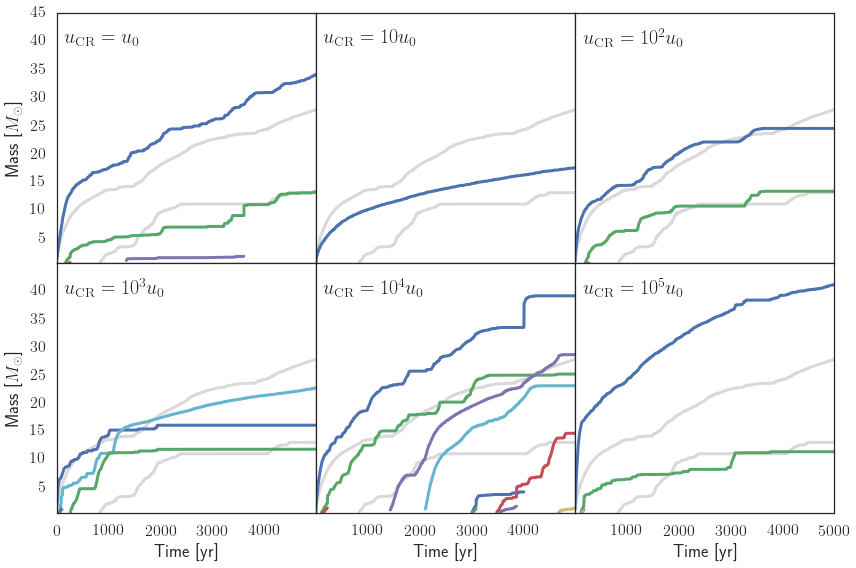

In [6]:
fig = plt.figure(2, figsize=(12,8))
ax0 = fig.add_subplot(231)
ax1 = fig.add_subplot(232)
ax2 = fig.add_subplot(233)
ax3 = fig.add_subplot(234)
ax4 = fig.add_subplot(235)
ax5 = fig.add_subplot(236)



slw = 3
sls = ['-', '--', '-.', ':']

for i, (ax, sinkset) in enumerate([(ax0,sinks0), (ax1,sinks1), (ax2,sinks2), (ax3,sinks3), (ax4,sinks4), (ax5,sinks5)]):
    for sinkID in sinksV.ID.unique():
        growth = sinksV[sinksV.ID == sinkID]['mass']
        ax = growth.plot(ax=ax, grid=False, lw=3, ls='-', color='.85')
    for j,sinkID in enumerate(sinkset.ID.unique()):
        growth = sinkset[sinkset.ID == sinkID]['mass']
        ax = growth.plot(ax=ax, grid=False, lw=3)
    ax.text(.03,.93, simname[name[i+1]], ha='left', va='top', size=20, transform=ax.transAxes)

        

ax0.xaxis.set_visible(False)
ax1.xaxis.set_visible(False)
ax2.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax4.yaxis.set_visible(False)
ax5.yaxis.set_visible(False)


for ax in fig.axes:
    ax.set_xlim(0,5000)
    ax.set_ylim(.5,45)
ax0.set_yticks((5,10,15,20,25,30, 35, 40, 45))
ax3.set_yticks((5,10,15,20,25, 30, 35, 40))
ax3.set_xticks((0,1000,2000,3000,4000))
ax4.set_xticks((1000,2000,3000,4000))
ax5.set_xticks((1000,2000,3000,4000,5000))

ax0.set_ylabel('Mass [$M_{\odot}$]')
ax3.set_ylabel('Mass [$M_{\odot}$]')
ax3.set_xlabel('Time [yr]')
ax4.set_xlabel('Time [yr]')
ax5.set_xlabel('Time [yr]')


plt.tight_layout(w_pad=0.0,h_pad=0.0)
fig.savefig('figures/sinks/sink_masses1.png', bbox_inches='tight')
plt.show()

In [7]:
total_mass = []
for i,data in enumerate([dataV, data0, data1, data2, data3, data4, data5]):
    mtot = data[['time','mass']].groupby('time').sum()
    mtot.rename(columns = {'mass':simname[name[i]]}, inplace=True)
    total_mass.append(mtot)

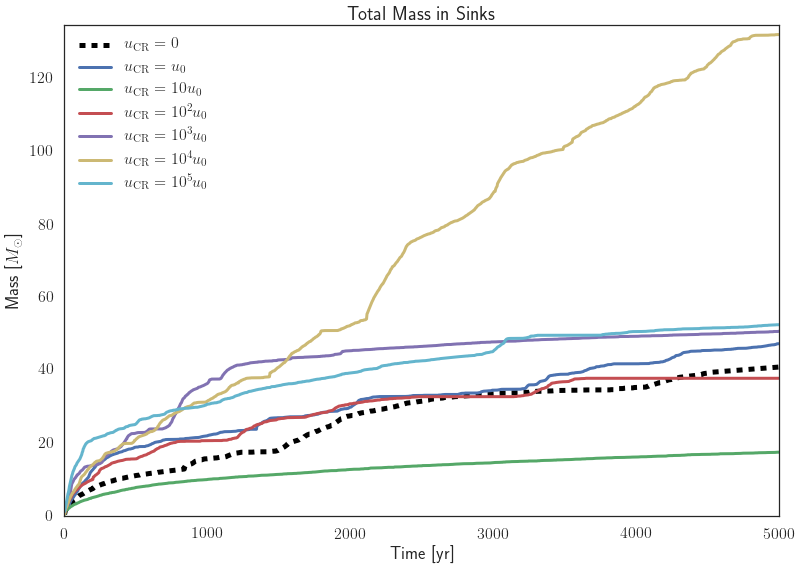

In [8]:
slw = 3
sls = ['-', '--', '-.', ':']
count = 0
plt.figure()
ax = plt.gca()
total_mass[0].plot(ax=ax, grid=False, lw=5, ls='--', color='k')
for i,mtot in enumerate(total_mass[1:]):
    mtot.plot(ax=ax, grid=False, lw=slw)
    
    
leg = plt.legend(loc=0)
plt.xlim(0,5000)
plt.ylim(0,135)

plt.ylabel('Mass [$M_{\odot}$]')
plt.xlabel('Time [yr]')
plt.title('Total Mass in Sinks')
plt.savefig('figures/sinks/total_sink_mass1.png', bbox_inches='tight')

In [9]:
most_massive_sink = []
for i,data in enumerate([dataV, data0, data1, data2, data3, data4, data5]):
    mms = data[['time','mass']].groupby('time').max()
    mms.rename(columns = {'mass':simname[name[i]]}, inplace=True)
    most_massive_sink.append(mms)

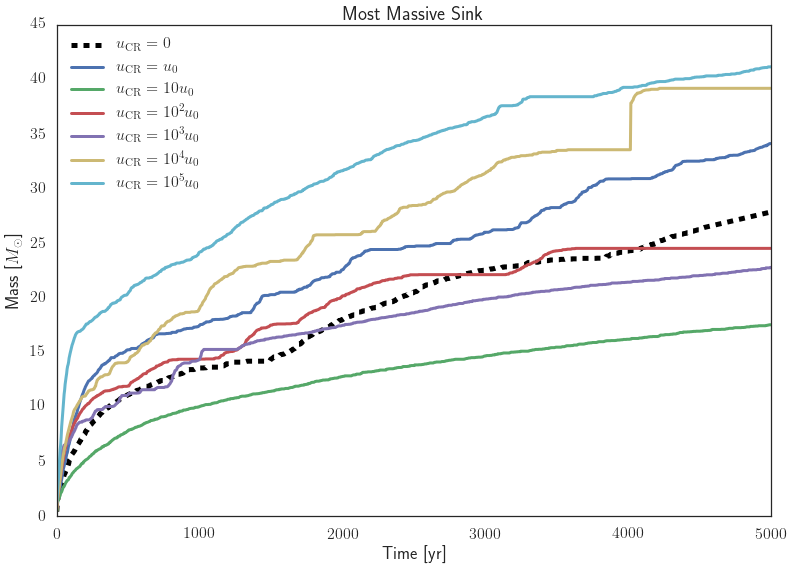

In [10]:
slw = 3
count = 0
plt.figure()
ax = plt.gca()
most_massive_sink[0].plot(ax=ax, grid=False, lw=5, ls='--', color='k')
for i,mms in enumerate(most_massive_sink[1:]):
    mms.plot(ax=ax, grid=False, lw=slw)
    
leg = plt.legend(loc=0)
plt.xlim(0,5000)
plt.ylim(0,45)

plt.ylabel('Mass [$M_{\odot}$]')
plt.xlabel('Time [yr]')
plt.title('Most Massive Sink')
plt.savefig('figures/sinks/most_massive_sink1.png', bbox_inches='tight')

##Halo 2!

In [11]:
sinkdata = pd.HDFStore(os.getenv("HOME")+'/data/stampede/sinkdata.hdf5')
dataV0 = sinkdata['vanilla']
dataV = sinkdata['halo2_new_indexing']
data0 = sinkdata['halo2_cr00']
data1 = sinkdata['halo2_cr01']
data2 = sinkdata['halo2_cr02']
data3 = sinkdata['halo2_cr03']
data4 = sinkdata['halo2_cr04']
data5 = sinkdata['halo2_cr05']
sinkdata.close()

In [12]:
data1.time = data1.time - data1.time[0]

In [13]:
sinksV0 = dataV0.set_index('time')
sinksV = dataV.set_index('time')
sinks0 = data0.set_index('time')
sinks1 = data1.set_index('time')
sinks2 = data2.set_index('time')
sinks3 = data3.set_index('time')
sinks4 = data4.set_index('time')
sinks5 = data5.set_index('time')

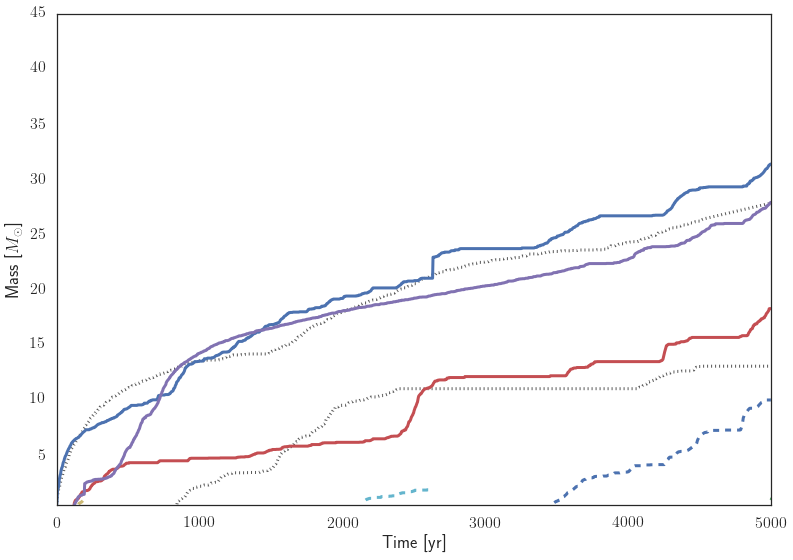

In [14]:
fig = plt.figure(1)
ax = fig.add_subplot(111)


slw = 3
sls = ['-', '--', '-.', ':']


for sinkID in sinksV0.ID.unique():
    growth = sinksV0[sinksV0.ID == sinkID]['mass']
    ax = growth.plot(ax=ax, grid=False, lw=3, ls=':', color='.35')
sinkset = sinksV
for j,sinkID in enumerate(sinkset.ID.unique()):
    growth = sinkset[sinkset.ID == sinkID]['mass']
    ax = growth.plot(ax=ax, grid=False, lw=3, ls=sls[j/4])

ax.set_xlim(0,5000)
ax.set_ylim(.5,45)
#ax0.set_yticks((5,10,15,20,25,30, 35, 40, 45))
#ax3.set_yticks((5,10,15,20,25, 30, 35, 40))

ax.set_ylabel('Mass [$M_{\odot}$]')
ax.set_xlabel('Time [yr]')


#plt.tight_layout(w_pad=0.0,h_pad=0.0)
fig.savefig('figures/sinks/sink_masses_halo2.png', bbox_inches='tight')
plt.show()

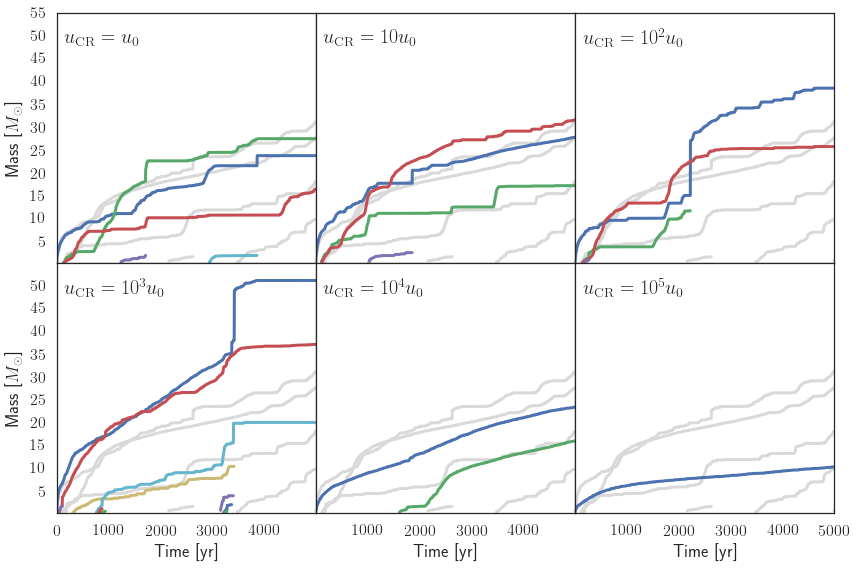

In [15]:
fig = plt.figure(2, figsize=(12,8))
ax0 = fig.add_subplot(231)
ax1 = fig.add_subplot(232)
ax2 = fig.add_subplot(233)
ax3 = fig.add_subplot(234)
ax4 = fig.add_subplot(235)
ax5 = fig.add_subplot(236)



slw = 3
sls = ['-', '--', '-.', ':']

for i, (ax, sinkset) in enumerate([(ax0,sinks0), (ax1,sinks1), (ax2,sinks2), (ax3,sinks3), (ax4,sinks4), (ax5,sinks5)]):
    for sinkID in sinksV.ID.unique():
        growth = sinksV[sinksV.ID == sinkID]['mass']
        ax = growth.plot(ax=ax, grid=False, lw=3, ls='-', color='.85')
    for j,sinkID in enumerate(sinkset.ID.unique()):
        growth = sinkset[sinkset.ID == sinkID]['mass']
        ax = growth.plot(ax=ax, grid=False, lw=3)
    ax.text(.03,.93, simname[name[i+1]], ha='left', va='top', size=20, transform=ax.transAxes)

        

ax0.xaxis.set_visible(False)
ax1.xaxis.set_visible(False)
ax2.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax4.yaxis.set_visible(False)
ax5.yaxis.set_visible(False)


for ax in fig.axes:
    ax.set_xlim(0,5000)
    ax.set_ylim(.5,55)
ax0.set_yticks((5,10,15,20,25,30, 35, 40, 45, 50, 55))
ax3.set_yticks((5,10,15,20,25, 30, 35, 40, 45, 50))
ax3.set_xticks((0,1000,2000,3000,4000))
ax4.set_xticks((1000,2000,3000,4000))
ax5.set_xticks((1000,2000,3000,4000,5000))

ax0.set_ylabel('Mass [$M_{\odot}$]')
ax3.set_ylabel('Mass [$M_{\odot}$]')
ax3.set_xlabel('Time [yr]')
ax4.set_xlabel('Time [yr]')
ax5.set_xlabel('Time [yr]')


plt.tight_layout(w_pad=0.0,h_pad=0.0)
fig.savefig('figures/sinks/sink_masses2.png', bbox_inches='tight')
plt.show()

In [16]:
data3[data3.ID == 3075950 ].tail(10)

,ID,time,mass,x,y,z,u,v,w
7257,3075950,6682.680128,51.236126,0.320446,0.331256,0.341447,-1.120627,-0.257529,1.471871
7260,3075950,6685.879246,51.236126,0.320446,0.331256,0.341447,-1.038667,-0.337690,1.449967
7264,3075950,6689.078363,51.236126,0.320446,0.331256,0.341447,-0.956862,-0.414748,1.430148
7267,3075950,6692.277480,51.236126,0.320446,0.331256,0.341447,-0.875130,-0.490172,1.411604
7270,3075950,6695.476597,51.236126,0.320446,0.331256,0.341447,-0.793094,-0.563271,1.394721
7273,3075950,6698.675714,51.236126,0.320446,0.331256,0.341447,-0.710665,-0.635131,1.378899
7276,3075950,6701.874831,51.236126,0.320446,0.331256,0.341447,-0.627323,-0.705283,1.364734
7279,3075950,6705.073948,51.236126,0.320446,0.331256,0.341447,-0.543233,-0.774695,1.351465
7282,3075950,6708.273064,51.236126,0.320446,0.331256,0.341447,-0.457594,-0.842524,1.339665
7285,3075950,6711.472181,51.236126,0.320446,0.331256,0.341447,-0.370764,-0.909503,1.328678


In [17]:
data3[data3.time > 3428][data3.time < 3429]

/home/jhummel/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


,ID,time,mass,x,y,z,u,v,w
4204,3075950,3428.133593,38.282849,0.320393,0.331234,0.341373,3.589517,-5.385058,0.084003
4205,8468271,3428.133593,10.659768,0.320394,0.331234,0.341373,-16.876876,9.699596,4.526901
4206,8382125,3428.133593,20.064598,0.320395,0.331232,0.341372,7.843292,-4.080193,3.065852
4207,8390866,3428.133593,35.195987,0.320397,0.331237,0.341376,-2.874582,6.708244,7.014770


In [18]:
data3[data3.time > 3431][data3.time < 3432]

,ID,time,mass,x,y,z,u,v,w
4208,3075950,3431.332846,48.971466,0.320393,0.331234,0.341373,-0.697993,-2.024601,0.495826
4209,8382125,3431.332846,20.064598,0.320395,0.331232,0.341372,7.561187,-3.704603,3.265999
4210,8390866,3431.332846,35.210412,0.320397,0.331237,0.341376,-3.014642,6.576425,6.935233


In [19]:
total_mass = []
for i,data in enumerate([dataV, data0, data1, data2, data3, data4, data5]):
    mtot = data[['time','mass']].groupby('time').sum()
    mtot.rename(columns = {'mass':simname[name[i]]}, inplace=True)
    total_mass.append(mtot)

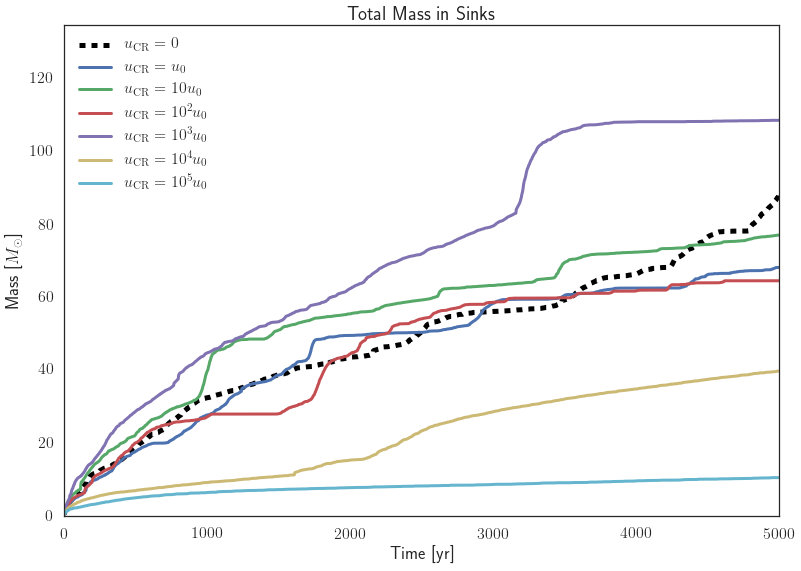

In [20]:
slw = 3
sls = ['-', '--', '-.', ':']
count = 0
plt.figure()
ax = plt.gca()
total_mass[0].plot(ax=ax, grid=False, lw=5, ls='--', color='k')
for i,mtot in enumerate(total_mass[1:]):
    mtot.plot(ax=ax, grid=False, lw=slw)
    
    
leg = plt.legend(loc=0)
plt.xlim(0,5000)
plt.ylim(0,135)

plt.ylabel('Mass [$M_{\odot}$]')
plt.xlabel('Time [yr]')
plt.title('Total Mass in Sinks')
plt.savefig('figures/sinks/total_sink_mass2.png', bbox_inches='tight')

In [21]:
most_massive_sink = []
for i,data in enumerate([dataV, data0, data1, data2, data3, data4, data5]):
    mms = data[['time','mass']].groupby('time').max()
    mms.rename(columns = {'mass':simname[name[i]]}, inplace=True)
    most_massive_sink.append(mms)

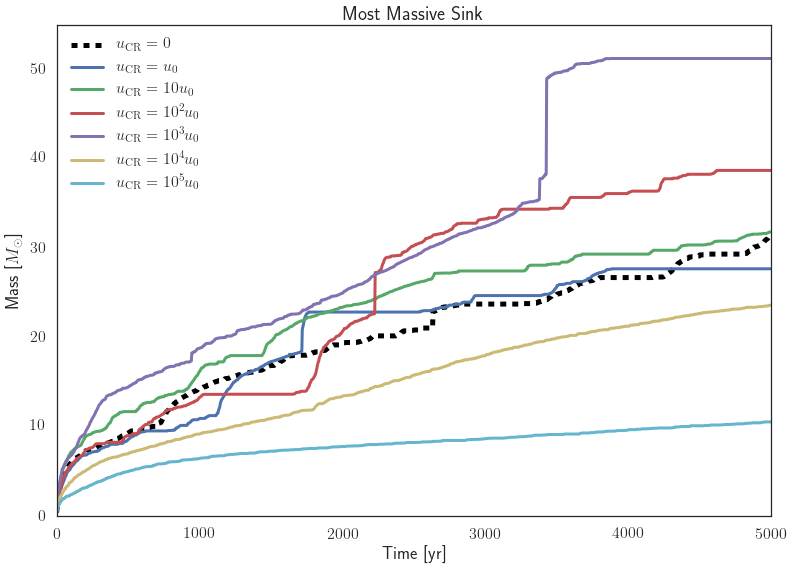

In [22]:
slw = 3
count = 0
plt.figure()
ax = plt.gca()
most_massive_sink[0].plot(ax=ax, grid=False, lw=5, ls='--', color='k')
for i,mms in enumerate(most_massive_sink[1:]):
    mms.plot(ax=ax, grid=False, lw=slw)
    
leg = plt.legend(loc=0)
plt.xlim(0,5000)
plt.ylim(0,55)

plt.ylabel('Mass [$M_{\odot}$]')
plt.xlabel('Time [yr]')
plt.title('Most Massive Sink')
plt.savefig('figures/sinks/most_massive_sink2.png', bbox_inches='tight')